In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./dataset/dataset_fix_clean.csv')

In [3]:
df.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,97.244041,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,100.000000,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,100.000000,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,100.000000,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,95.182643,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AQI                5811 non-null   float64
 1   PM10               5811 non-null   float64
 2   PM2_5              5811 non-null   float64
 3   NO2                5811 non-null   float64
 4   SO2                5811 non-null   float64
 5   O3                 5811 non-null   float64
 6   Temperature        5811 non-null   float64
 7   Humidity           5811 non-null   float64
 8   WindSpeed          5811 non-null   float64
 9   HealthImpactScore  5811 non-null   float64
 10  HealthImpactClass  5811 non-null   float64
dtypes: float64(11)
memory usage: 499.5 KB


In [4]:
df.describe()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,93.785223,0.281191
std,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,13.318904,0.714075
min,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,22.448488,0.000000
25%,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,98.203057,0.000000
50%,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,100.000000,0.000000
75%,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,100.000000,0.000000
max,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,100.000000,4.000000


In [5]:
# Pisahkan fitur (X) dan target (y)
X = df[['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']]
y = df['HealthImpactScore']

In [6]:
# Split data ke training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# 5. Define Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

c:\Users\Fadika\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

In [10]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
# 6. Train the Model with Epochs
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,  # Number of epochs
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2978.9314 - mae: 40.6782 - val_loss: 166.5800 - val_mae: 10.3375
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 146.6568 - mae: 9.5212 - val_loss: 116.6406 - val_mae: 8.5817
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 116.3122 - mae: 8.5293 - val_loss: 101.5967 - val_mae: 8.2334
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103.4656 - mae: 7.8525 - val_loss: 100.6928 - val_mae: 7.8277
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 98.3084 - mae: 7.6670 - val_loss: 104.0247 - val_mae: 8.2559
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 97.0470 - mae: 7.7262 - val_loss: 96.7086 - val_mae: 7.6257
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 81.4292 - mae: 6.8808 - val_loss: 13.0941 - val_mae: 2.6298
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 9.2937 - mae: 2.2414 - val_loss: 1.8993 - val_mae: 1.0777
Epoch 9/10

In [12]:
# 7. Evaluate the Model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss (MSE): {loss}")
print(f"Test Mean Absolute Error (MAE): {mae}")


Test Loss (MSE): 0.004757432732731104
Test Mean Absolute Error (MAE): 0.04796614497900009


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluasi Model pada Data Uji
y_pred = model.predict(X_test_scaled)

# Hitung Metrik Evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tampilkan Hasil Evaluasi
print("Evaluasi Akurasi Model pada Data Uji:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Evaluasi Akurasi Model pada Data Uji:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R-squared (R²): 1.00


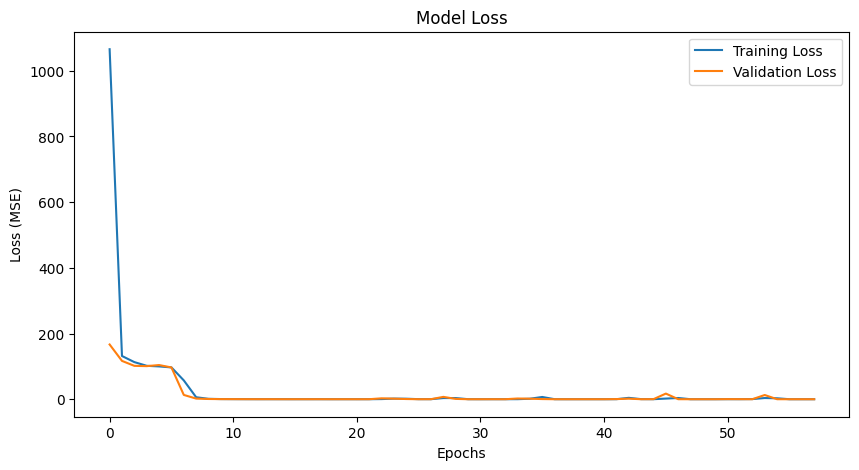

In [14]:
# 8. Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [15]:
def classify_health_impact(score):
    """
    Mengklasifikasikan HealthImpactScore ke dalam kategori.
    """
    if score <= 20:
        return "Sehat (Healthy)"
    elif score <= 50:
        return "Sedang (Moderate)"
    elif score <= 100:
        return "Tidak Sehat (Unhealthy)"
    elif score <= 150:
        return "Sangat Tidak Sehat (Very Unhealthy)"
    else:
        return "Berbahaya (Hazardous)"

In [16]:
new_sample = np.array([[187.2700594, 295.8530392, 13.03856044, 6.639263013, 66.16114965, 54.62427998, 5.150335038, 84.42434365, 6.137755447]])  # Ganti dengan nilai fitur aktual
new_sample_scaled = scaler.transform(new_sample)  # Skalakan input
prediction = model.predict(new_sample_scaled)

print("\nPrediksi untuk Sampel Baru:")
print("Fitur Input:", new_sample[0])
print("Skor Prediksi (Health Impact Score):", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Prediksi untuk Sampel Baru:
Fitur Input: [187.2700594  295.8530392   13.03856044   6.63926301  66.16114965
  54.62427998   5.15033504  84.42434365   6.13775545]
Skor Prediksi (Health Impact Score): 97.28868


c:\Users\Fadika\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
# Sampel baru
new_sample = np.array([[187.2700594, 295.8530392, 13.0856044, 6.639263013, 66.16114965,
                        54.62427998, 5.150335083, 84.42434365, 6.137755447]])  # Fitur

# Preprocessing: Skalakan sampel
new_sample_scaled = scaler.transform(new_sample)

# Prediksi skor menggunakan model
predicted_score = model.predict(new_sample_scaled)[0][0]

# Klasifikasi skor ke dalam kategori
predicted_class = classify_health_impact(predicted_score)

# Menampilkan hasil
print("\nPrediksi untuk Sampel Baru:")
print("Fitur Input:", new_sample[0])
print("Skor Prediksi (Health Impact Score):", predicted_score)
print("Klasifikasi:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediksi untuk Sampel Baru:
Fitur Input: [187.2700594  295.8530392   13.0856044    6.63926301  66.16114965
  54.62427998   5.15033508  84.42434365   6.13775545]
Skor Prediksi (Health Impact Score): 97.29817
Klasifikasi: Tidak Sehat (Unhealthy)


c:\Users\Fadika\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


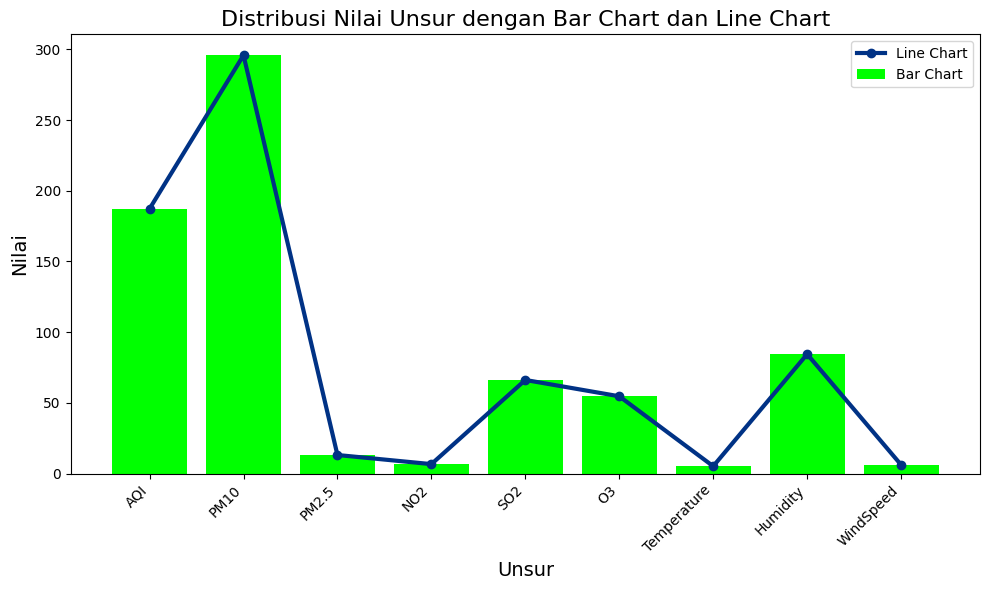

In [38]:
# Data yang diberikan sesuai urutan fitur
data = [187.2700594, 295.8530392, 13.0856044, 6.639263013, 66.16114965,
        54.62427998, 5.150335083, 84.42434365, 6.137755447]

# Fitur sesuai urutan yang diminta
features = ['AQI', 'PM10', 'PM2.5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']

# Mengubah data menjadi DataFrame untuk mempermudah plotting
data_df = pd.DataFrame([data], columns=features)

# Visualisasi Bar Chart untuk semua fitur dalam satu chart
plt.figure(figsize=(10, 6))

# Bar chart
plt.bar(features, data_df.iloc[0], color='lime', label='Bar Chart')

# Line chart (untuk menambahkan garis di atas bar chart)
plt.plot(features, data_df.iloc[0], color='#003285', marker='o', linestyle='-', linewidth=3, label='Line Chart')

# Menambahkan judul dan label
plt.title('Distribusi Nilai Unsur dengan Bar Chart dan Line Chart', fontsize=16)
plt.xlabel('Unsur', fontsize=14)
plt.ylabel('Nilai', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotasi label x agar mudah dibaca
plt.tight_layout()

# Menampilkan legenda
plt.legend()

# Menampilkan grafik
plt.show()
